In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import datetime

import gym
import trading_env

import os
import agent 
from os import __file__

Loading historical data file


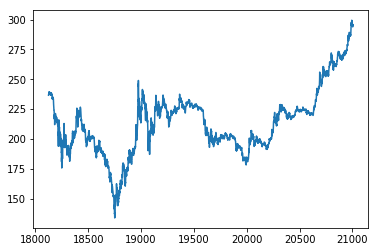

In [5]:
env_trading = gym.make('test_trading-v0')
NUM_EP = 400
date = datetime.datetime(2017, 7, 10, 0, 0)
data = env_trading.historical_data["close"]
env_trading.reset(date=date)
plt.plot(data[env_trading.start_index:env_trading.start_index + int(env_trading.episode_steps) 
              if env_trading.start_index + int(env_trading.episode_steps) < data.shape[0]
             else data.shape[0]])

plt.show()

Loading historical data file


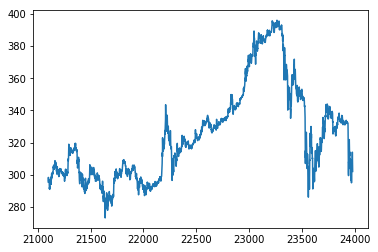

In [6]:
env_trading_test = gym.make('test_trading-v0')
date_test = datetime.datetime(2017, 8, 10, 0, 0)
data = env_trading_test.historical_data["close"]
env_trading_test.reset(date=date_test)
plt.plot(data[env_trading_test.start_index:env_trading_test.start_index + int(env_trading_test.episode_steps) 
              if env_trading_test.start_index + int(env_trading_test.episode_steps) < data.shape[0]
             else data.shape[0]])

plt.show()

## The Goal
Have a better cumulated reward and final portfolio value than the three following agents:
- The "holder" (action = 1)
- The "All out" (action = -1)
- The "I have no idea what I am doing" (random action)


# Holder

In [7]:
state = env_trading.reset(date=date)
total_reward = 0

while(True):
    action = 1.0 #Holder agent
    state, reward, done, _ = env_trading.step(action)
    total_reward += reward
    if done:
        break
holder_reward = np.full(NUM_EP, total_reward)

# Random

In [8]:
state = env_trading.reset(date=date)
total_reward = 0

while(True):
    action = env_trading.action_space.sample()
    state, reward, done, _ = env_trading.step(action)
    total_reward += reward
    if done:  
        break
random_reward = np.full(NUM_EP, total_reward)

# All out

In [9]:
out_reward = np.full(NUM_EP, 0)

# The Agent

### Stochastic Policy Gradient

In [ ]:
agentSPG = agent.StochasticPolicyGradientAgent(env_trading, learning_rate = 1e-4, 
                                               discount_rate = 0.99, batch_size = 64)

In [ ]:
rewards_plot = []
portfolio = []
for i in range(NUM_EP):
    state = env_trading.reset(date=date)
    state = np.reshape(state,200)
    total_reward = 0
    
    while(True):
        action = agentSPG.act([state])
        print(action)
        state, reward, done, _ = env_trading.step(action)
        state = np.reshape(state,200)
        agentSPG.store_step(action, state, reward)
        total_reward += reward
        if done:
            rewards_plot.append(total_reward)
            portfolio.append(env_trading.portfolio_value)
            print("Episode: {}, Total reward: {}".format(i,total_reward))
            break
    agentSPG.train()


In [ ]:
plt.plot(rewards_plot, label = "Trained agent")
plt.plot(holder_reward, label = "Holder")
plt.plot(random_reward, label = "Random")
plt.plot(out_reward, label = "All out")
plt.legend()
plt.show()

### Deep Q Network

In [14]:
agentDQN = agent.DQNAgent(env_trading, alpha = 1e-4, epsilon_log_decay = 0.8)

In [15]:
rewards_plot = []
rewards_plot_test = []

date = datetime.datetime(2017, 7, 15, 0, 0)
date_test = datetime.datetime(2017, 8, 15, 0, 0)

for e in range(NUM_EP):

    state = np.reshape(env_trading.reset(date=date), [1, 200])
    state_test = np.reshape(env_trading_test.reset(date=date_test), [1, 200])
    score = 0
    score_test = 0
    
    while(True):
        action = agentDQN.act(state, step = e)
        next_state, reward, done, _ = env_trading.step(action - 1) #Converting class to action
        next_state = np.reshape(next_state, [1, 200])

        agentDQN.store_step(state, action, reward, next_state, done)

        state = next_state

        score += reward

        if done:
            rewards_plot.append(score)
            print("Episode: {}, Total reward: {}".format(e, score))
            break
            
    while(True):
        action_test = agentDQN.act(state_test)
        state_test, reward_test, done_test, _ = env_trading_test.step(action_test - 1) #Converting class to action
        state_test = np.reshape(state_test, [1, 200])
        score_test += reward_test
        if done_test:
            rewards_plot_test.append(score_test)
            print("Final test cumulated reward: {}".format(score_test))
            break
    
    agentDQN.train()

Episode: 0, Total reward: 0.0
Final test cumulated reward: -9.606742712019308
Episode: 1, Total reward: -1.4362921974148704
Final test cumulated reward: -2.3539092323693516
Episode: 2, Total reward: 0.1880228623443433
Final test cumulated reward: -0.12815237848971472
Episode: 3, Total reward: -1.3340249230499552
Final test cumulated reward: 1.1670099581450055
Episode: 4, Total reward: 0.9184368372572782
Final test cumulated reward: -3.1137861023853013
Episode: 5, Total reward: 0.021425731928345848
Final test cumulated reward: -3.1433301626624734
Episode: 6, Total reward: 1.7642754127543125
Final test cumulated reward: -2.9254338635114867
Episode: 7, Total reward: 1.3411913485981077
Final test cumulated reward: -3.0988595038845186
Episode: 8, Total reward: -0.80187892315151
Final test cumulated reward: -2.3202004301598773
Episode: 9, Total reward: 2.1355239510559594
Final test cumulated reward: -1.6150808301240964
Episode: 10, Total reward: 1.7348151480509961
Final test cumulated reward

Episode: 88, Total reward: 44.7580995286523
Final test cumulated reward: 17.542260827758113
Episode: 89, Total reward: 57.58931035193526
Final test cumulated reward: 20.20787165176139
Episode: 90, Total reward: 50.779738769950846
Final test cumulated reward: 18.96008992639705
Episode: 91, Total reward: 46.36566728505326
Final test cumulated reward: 17.45244683435516
Episode: 92, Total reward: 49.65629949036312
Final test cumulated reward: 17.871786612001745
Episode: 93, Total reward: 53.60319229925774
Final test cumulated reward: 13.926359555167322
Episode: 94, Total reward: 52.63418033791191
Final test cumulated reward: 16.519184884504803
Episode: 95, Total reward: 52.93980888048402
Final test cumulated reward: 17.760976477037353
Episode: 96, Total reward: 48.248255815621924
Final test cumulated reward: 19.012877644419493
Episode: 97, Total reward: 55.359414961511725
Final test cumulated reward: 16.30284162719575
Episode: 98, Total reward: 43.39307593815389
Final test cumulated reward

Episode: 175, Total reward: 165.44899578900544
Final test cumulated reward: 6.5657947874420906
Episode: 176, Total reward: 164.28557278266885
Final test cumulated reward: 4.7443330037935105
Episode: 177, Total reward: 132.58203347379936
Final test cumulated reward: -3.862892984706888
Episode: 178, Total reward: 139.28789194596126
Final test cumulated reward: 2.7836511577778325
Episode: 179, Total reward: 132.15521438032826
Final test cumulated reward: -1.642676681918494
Episode: 180, Total reward: 136.49334180287465
Final test cumulated reward: 0.03332748947269537
Episode: 181, Total reward: 158.06103724556672
Final test cumulated reward: 6.317237265460985
Episode: 182, Total reward: 143.6181818238578
Final test cumulated reward: 6.6050580877230045
Episode: 183, Total reward: 146.33110352691136
Final test cumulated reward: -0.22564763525016052
Episode: 184, Total reward: 143.33629009470908
Final test cumulated reward: 2.45666090372508
Episode: 185, Total reward: 140.5884386839341
Final

Final test cumulated reward: 10.220800556755178
Episode: 263, Total reward: 201.68426906367583
Final test cumulated reward: 2.059267063521761
Episode: 264, Total reward: 223.6342202935507
Final test cumulated reward: 9.400039831577573
Episode: 265, Total reward: 195.38026552637035
Final test cumulated reward: 7.4350006787734975
Episode: 266, Total reward: 217.01933204684013
Final test cumulated reward: 12.739603364061091
Episode: 267, Total reward: 207.24130750825492
Final test cumulated reward: 11.940088872382
Episode: 268, Total reward: 220.7198625812054
Final test cumulated reward: 11.680939265670213
Episode: 269, Total reward: 198.47121707226074
Final test cumulated reward: 10.715540937981176
Episode: 270, Total reward: 229.22116738573354
Final test cumulated reward: 12.28952312892012
Episode: 271, Total reward: 225.87108993709256
Final test cumulated reward: 12.98788555747023
Episode: 272, Total reward: 209.49731753450692
Final test cumulated reward: 8.181976503326814
Episode: 273

Episode: 350, Total reward: 306.57850194908013
Final test cumulated reward: 3.912644244145357
Episode: 351, Total reward: 278.69524616088717
Final test cumulated reward: 6.272438451980302
Episode: 352, Total reward: 289.89934427515607
Final test cumulated reward: 6.218685360556926
Episode: 353, Total reward: 274.82471803706164
Final test cumulated reward: 5.840791217408971
Episode: 354, Total reward: 301.1090920739861
Final test cumulated reward: 3.2233106746251243
Episode: 355, Total reward: 297.60710333373254
Final test cumulated reward: 2.0521967351191015
Episode: 356, Total reward: 289.8440488962801
Final test cumulated reward: 5.009379391617998
Episode: 357, Total reward: 282.3693463068359
Final test cumulated reward: -1.1059427988170156
Episode: 358, Total reward: 285.57060923858234
Final test cumulated reward: 3.7608561748698164
Episode: 359, Total reward: 308.04471000021675
Final test cumulated reward: 4.336345304875748
Episode: 360, Total reward: 281.57976721906016
Final test 

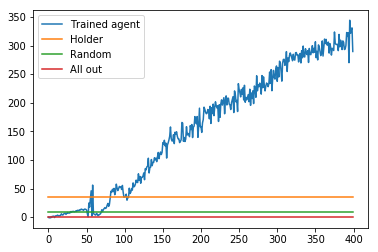

In [16]:
plt.plot(rewards_plot, label = "Trained agent")
plt.plot(holder_reward, label = "Holder")
plt.plot(random_reward, label = "Random")
plt.plot(out_reward, label = "All out")
plt.legend()
plt.show()

The DQN agent is able to have a greater cumulated reward than the 3 other agents.

### Testing

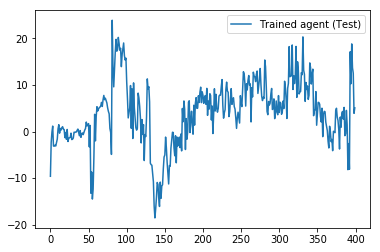

In [17]:
plt.plot(rewards_plot_test, label = "Trained agent (Test)")
plt.legend()
plt.show()

### DDPG

In [10]:
agentDDPG = agent.DDPGAgent(env_trading, epsilon_log_decay=0.99, tau = 0.001, actor_lr = 1e-4, critic_lr = 1e-4) #Do not run after running DQN, to correct!

Defining exploration noise

In [11]:
# Ornstein-Uhlenbeck noise by lirnli/OpenAI-gym-solutions

def UONoise():
    theta = 0.15
    sigma = 0.2
    state = 0
    while True:
        yield state
        state += -theta*state+sigma*np.random.randn()

In [12]:
date = datetime.datetime(2017, 7, 10, 0, 0)
noise = UONoise()
scores = []

for e in range(NUM_EP):
    state = np.reshape(env_trading.reset(date=date), 200)
    score = 0
    p = e/NUM_EP

    while(True):
        action = agentDDPG.actor.act([state], step = e)
        next_state, reward, done, _ = env_trading.step(action)
        next_state = np.reshape(next_state, 200)
        score += reward
        
        agentDDPG.store_step(state, action, reward, next_state, done)

        if done:
            agentDDPG.train()
            scores.append(score)
            print("Episode: {}, Total reward: {}".format(e, score))
            break
        state = next_state

Episode: 0, Total reward: 31.699027130917404
Episode: 1, Total reward: 0.21151245913469413
Episode: 2, Total reward: 47.25401252161494
Episode: 3, Total reward: 35.19226807724327
Episode: 4, Total reward: 28.648344017232475
Episode: 5, Total reward: 37.73486334522609
Episode: 6, Total reward: 31.76769425066052
Episode: 7, Total reward: 32.97705882892705
Episode: 8, Total reward: 39.753490376843075
Episode: 9, Total reward: 35.23365426881059
Episode: 10, Total reward: 32.410990539098336
Episode: 11, Total reward: 33.866308066036716
Episode: 12, Total reward: 42.858714095629246
Episode: 13, Total reward: 40.15754274717436
Episode: 14, Total reward: 40.943395950340644
Episode: 15, Total reward: 45.306573984543185
Episode: 16, Total reward: 26.01644161077114
Episode: 17, Total reward: 35.61981463215337
Episode: 18, Total reward: 32.29448559350962
Episode: 19, Total reward: 42.29490778341962
Episode: 20, Total reward: 20.014852204876565
Episode: 21, Total reward: 39.15714665080839
Episode: 

Episode: 179, Total reward: 37.03753846096389
Episode: 180, Total reward: 53.59084570147512
Episode: 181, Total reward: 39.63136345298015
Episode: 182, Total reward: 44.98722138297762
Episode: 183, Total reward: 35.43539611883917
Episode: 184, Total reward: 45.60025055856646
Episode: 185, Total reward: 43.865001610649855
Episode: 186, Total reward: 50.79661672601083
Episode: 187, Total reward: 47.41353789231986
Episode: 188, Total reward: 45.65048011720065
Episode: 189, Total reward: 46.64621947082318
Episode: 190, Total reward: 48.02626341986657
Episode: 191, Total reward: 43.826127347176914
Episode: 192, Total reward: 42.18023749197719
Episode: 193, Total reward: 42.09944013392973
Episode: 194, Total reward: 45.94933915333684
Episode: 195, Total reward: 50.58511935752153
Episode: 196, Total reward: 50.39505008374051
Episode: 197, Total reward: 46.44019935961464
Episode: 198, Total reward: 45.76484724066849
Episode: 199, Total reward: 47.611308632587296
Episode: 200, Total reward: 38.

Episode: 357, Total reward: 50.34868064183293
Episode: 358, Total reward: 46.50767360745163
Episode: 359, Total reward: 50.90723033637798
Episode: 360, Total reward: 38.20802046825298
Episode: 361, Total reward: 39.15958009130234
Episode: 362, Total reward: 45.17487875245378
Episode: 363, Total reward: 43.85381750564441
Episode: 364, Total reward: 52.78636618377048
Episode: 365, Total reward: 50.312492679161956
Episode: 366, Total reward: 38.31050836590155
Episode: 367, Total reward: 50.880051871003225
Episode: 368, Total reward: 53.885100293743356
Episode: 369, Total reward: 40.54493357881536
Episode: 370, Total reward: 41.18065019922433
Episode: 371, Total reward: 49.16618077450667
Episode: 372, Total reward: 37.16080164210234
Episode: 373, Total reward: 44.65153586349615
Episode: 374, Total reward: 35.71942279858982
Episode: 375, Total reward: 42.74420457090024
Episode: 376, Total reward: 45.381353554542954
Episode: 377, Total reward: 43.922285636176234
Episode: 378, Total reward: 3

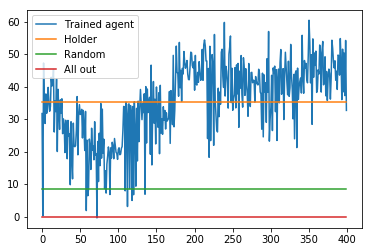

In [13]:
plt.plot(scores, label = "Trained agent")
plt.plot(holder_reward, label = "Holder")
plt.plot(random_reward, label = "Random")
plt.plot(out_reward, label = "All out")
plt.legend()
plt.show()

### Testing

In [ ]:
date = datetime.datetime(2017, 7, 15, 0, 0) # Next month
state = np.reshape(env_trading.reset(date=date), 200)
score = 0
while(True):
    action = agentDDPG.actor.act([state])
    state, reward, done, _ = env_trading.step(action)
    state = np.reshape(state, 200)
    score += reward
    if done:
        print("Final cumulated reward: {}".format(score))
        break